In [27]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [28]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [29]:
df.head()
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[:,4].values

In [31]:
y = np.where(y == 'Iris-virginica',-1,1)

In [32]:
X = df.iloc[0:100,0:2].values
X.shape
y.shape

(150,)

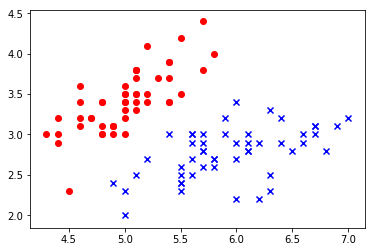

In [33]:
plt.scatter(X[0:50,0],X[0:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x', label='virginica')

# Perceptron

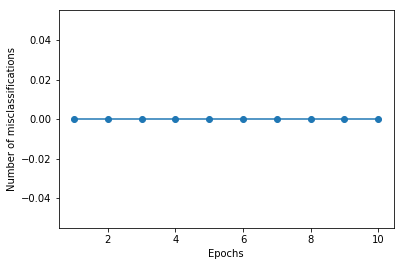

In [34]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X,y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','light-green', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:lne(np.unique(y))])
    
    #plt the decsion surface
    x1_min, x1_max = X[:,0].min()-1, X[:0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arran)